In [74]:
#191128
import os, pickle
import pandas as pd
import numpy as np
base_path='/home/op/kernel/thesis/data/cbm/countries/'
dff = pd.read_csv(base_path+'countries_all_prototype.csv', index_col='Country')
dff2 = pd.read_csv(base_path+'Tax rates EU.csv', index_col='Country', encoding='utf-8')

dffr = dff.drop(columns='rvi_class')#.drop(columns='ep_epi')
dffr['size']=[11.3,0.8,1.3,70.0,82.5,4.9,60.5,2.8,17.0,37.9,2.0,46.5,10.0]
dffr['gdp']=[1.14,0.7,3.33,1.13,1.53,7.76,0.01,3.24,1.41,3.34,1.79,1.11,2.16]
df1 = dffr.copy()
df2 = dff2.copy()
# @pandas reindex second dataframe by first dataframe and then concatenate
df = pd.concat([df1,df2.reindex(df1.index)], axis = 1)
print(dffr.shape, df.shape)
print(df.columns)
df = df.drop(columns='cbm_out').drop(columns='cbm_in')
df.iloc[:,20::]
df.to_csv(base_path+"indicators_2013_13countries.csv")
#dffr = dffr.drop(columns='cbm_out').drop(columns='cbm_in')

(13, 22) (13, 25)
Index(['ep_epi', 'ep_wr', 'ep_br', 'ep_cbv', 'ep_tud', 'tax_e', 'tax_n',
       'rvi_lse', 'cpi_2013_0', 'cpi_2013_1', 'cpi_2013_2', 'cpi_2013_3',
       'cpi_2013_4', 'cpi_2013_5', 'cpi_2013_6', 'cpi_2013_7', 'cpi_2013_8',
       'cpi_2013_9', 'cbm_out', 'cbm_in', 'size', 'gdp',
       'Number of Tax Treaties in force', 'Dividend tax rate',
       'Exit Taxation Rate'],
      dtype='object')


[0.79015133 0.1229103  0.05380862]
[120.05252427  47.34894495  31.32867961]
[[ -2.51011819  23.0087491    4.40195191]
 [-36.44272207  -5.84256866 -15.19233825]
 [-37.23057896  -9.95345448 -13.62260097]
 [ 60.07445814  11.18928577 -11.69466914]
 [ 54.53131869 -18.98667538   6.5014543 ]
 [-23.19289141   5.88481314  15.88924989]
 [ 37.00666047  -9.71929081  -2.09303625]
 [-38.09566206 -12.05690064   4.08910113]
 [ -3.12051513  14.20132317   1.85448442]
 [  8.70308322  -6.48806791   0.82250951]
 [-34.81476863  -6.67467789   6.77364612]
 [ 20.57280961  -6.62827351   5.63777036]
 [ -5.48107368  22.06573809  -3.36752304]]


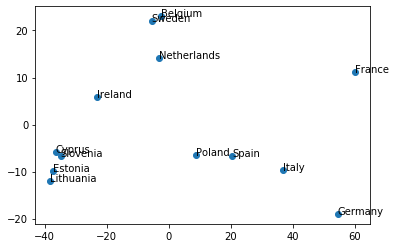

In [70]:
#run PCA to find most important distances
from sklearn.decomposition import PCA
x = df.to_numpy()
pca = PCA(n_components=3)
pca.fit(x)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
X = pca.transform(x)
print(X)

# plot
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1])

for i, txt in enumerate(dffr.index):
    ax.annotate(txt, (X[i,0], X[i,1]))

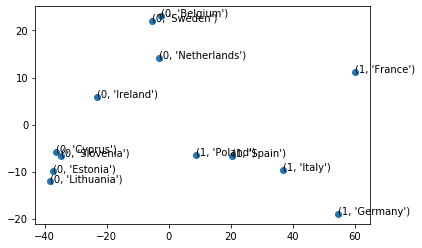

In [72]:
# clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(x)
kmeans.labels_

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1])

for i, txt in enumerate(zip(kmeans.labels_, dffr.index)):
    ax.annotate(txt, (X[i,0], X[i,1]))
plt.savefig('countries.png')

In [78]:
for i, txt in enumerate(zip(kmeans.labels_, dffr.index)):
    print(txt)
policy = list(kmeans.labels_)
policy

(0, 'Belgium')
(0, 'Cyprus')
(0, 'Estonia')
(1, 'France')
(1, 'Germany')
(0, 'Ireland')
(1, 'Italy')
(0, 'Lithuania')
(0, 'Netherlands')
(1, 'Poland')
(0, 'Slovenia')
(1, 'Spain')
(0, 'Sweden')


[0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0]

In [82]:
dffr[['cbm_out','cbm_in']]
-dffr['cbm_out']+dffr['cbm_in']

Country
Belgium        -16
Cyprus           4
Estonia         22
France          71
Germany        320
Ireland        -18
Italy          132
Lithuania       -6
Netherlands    226
Poland          -9
Slovenia         4
Spain           62
Sweden          97
dtype: int64

In [83]:
dffr.index

Index(['Belgium', 'Cyprus', 'Estonia', 'France', 'Germany', 'Ireland', 'Italy',
       'Lithuania', 'Netherlands', 'Poland', 'Slovenia', 'Spain', 'Sweden'],
      dtype='object', name='Country')